**Dataset used:**
We have 1030 observations on 9 variables. We try to estimate the Complete compressive strength(CRS) using:

- Cement - kg in a m3 mixture
- Blast Furnace Slag - kg in a m3 mixture
- Fly Ash - kg in a m3 mixture
- Water - kg in a m3 mixture
- Superplasticizer - kg in a m3 mixture
- Coarse Aggregate - kg in a m3 mixture
- Fine Aggregate - kg in a m3 mixture
- Age - Day (1-365)

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [66]:
path= "/home/mayur/Downloads/statistics/Concrete_Data.csv"
data = pd.read_csv(path)

In [67]:
data.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [68]:
data.tail()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [69]:
data.shape

(1030, 9)

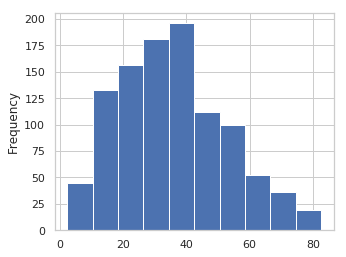

In [70]:
target = data['CMS']

target.plot(kind='hist')

# Data Preprocessing
### missing values 

In [71]:
data.dropna(axis=0, how='all')

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [72]:
# Now the data is divided into independent (x) and dependent variables (y)
x = data.iloc[:,0:8]
y = data.iloc[:,8:]

### Splitting the data into training and test sets
- Using sklearn we split 80% of our data into training set and rest in test set. Setting random_state will give the same training and test set everytime on running the code.

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100) 

### Running linear regression using sklearn

In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(x_train,y_train)   #lm.fit(input,output)

In [76]:
lm.coef_

array([[ 0.12415357,  0.10366839,  0.093371  , -0.13429401,  0.28804259,
         0.02065756,  0.02563037,  0.11461733]])

In [78]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)

In [79]:
coefficients

,0,0
0,Cement,0.124154
1,Blast,0.103668
2,Fly Ash,0.093371
3,Water,-0.134294
4,Superplasticizer,0.288043
5,CA,0.020658
6,FA,0.025630
7,Age,0.114617


### To predict the values of y on the test set we use lm.predict( )

In [80]:
y_pred = lm.predict(x_test)

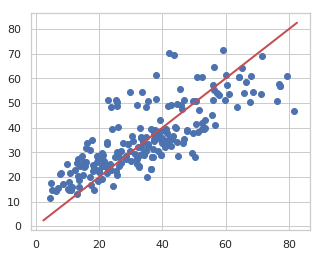

In [81]:
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', lw=2)
plt.show()

In [82]:
# error
y_error = y_test - y_pred

In [84]:
# r -square
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.622520087740484

# Running linear regression using statsmodels: 

In [90]:
import statsmodels.api as sma
X_train = sma.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test = sma.add_constant(x_test) 

In [91]:
import statsmodels.formula.api as sm
lm2 = sm.OLS(y_train,X_train).fit()

In [92]:
# model summary
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     161.0
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          4.37e-162
Time:                        08:30:26   Log-Likelihood:                -3090.4
No. Observations:                 824   AIC:                             6199.
Df Residuals:                     815   BIC:                             6241.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.2735     29.931     -1.145      0.253     -93.025      24.478
Cement               0.1242      0.010     13.054      0.000       0.105       0.143
Blast                0.1037      0.011      9.229      0.000       0.082       0.126
Fly Ash              0.0934      0.014      6.687      0.000       0.066       0.121
Water               -0.1343      0.046     -2.947      0.003      -0.224      -0.045
Superplasticizer     0.2880      0.102      2.810      0.005       0.087       0.489
CA                   0.0207      0.011      1.966      0.050    2.79e-05       0.041
FA                   0.0256      0.012      2.131      0.033       0.002       0.049
Age                  0.1146      0.006     19.064      0.000       0.103       0.126
==============================================================================
Omnibus:                        3.757   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.762
Skew:                          -0.165   Prob(JB):                        0.152
Kurtosis:                       2.974   Cond. No.                     1.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
y_pred2 = lm2.predict(X_test) 

In [96]:
test = y_test['CMS']

### Note that both y_pred and y_pred2 are same. It's just these are calculated via different packages.

In [97]:
# R squared 

import numpy as np
y_test = pd.to_numeric(test, errors='coerce')
RSS = np.sum((y_pred2 - y_test)**2)
y_mean = np.mean(y_test)
TSS = np.sum((y_test - y_mean)**2)
R2 = 1 - RSS/TSS
print("R-squared" ,R2)

n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print("adj_rsquared", adj_rsquared)

R-squared 0.6225200877404832
adj_rsquared 0.607190954247711
